In [1]:
# Copyright 2022 Victor I. Afolabi
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Basic classification: Classify images of clothing

We train a neural network model to classify images of clothing, like sneakers and shirts.

In [2]:
# TensorFlow and tf.keras.
import tensorflow as tf

# Helper libraries.
import numpy as np
import matplotlib.pyplot as plt

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.10.0


## Import the Fashion MNIST dataset

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories.
Each image contains a low resolution 28x28 images. Fashion MNIST is intended as
a drop-in replacement for the classic MNIST ddataset -- which is often reffered
to as the "Hello, World!" of Machine Learning programs for computer vision.

Here, 60k images are used to train the network and 10k images to evaluate how
accurate the network learned to classifiy images.

In [3]:
# Download the Fashion MNIST dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot',
]

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60k images in the training set, with each image represented as 28x28 pixels.

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
# Likewise, there are 60k labels in training set.
len(train_labels)

60000

In [7]:
# Each label is an integer between 0 & 9.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# There are 10k images in testset.
print(f'{test_images.shape = }')
print(f'{test_labels.shape = }')

test_images.shape = (10000, 28, 28)
test_labels.shape = (10000,)


## Process the data

The data must be preprocessed before training the newtwork. If you inspect the first image in the traiing set,
you will see that the pixel values fall in the range of 20 to 255

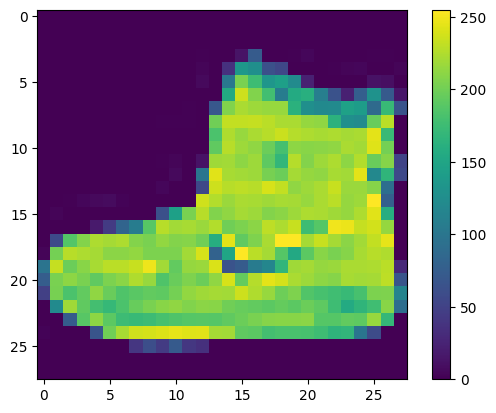

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Scale the values to range between 0 to 1 before feeding them to the model.
train_images = train_images / 255.0
test_images = test_images / 255.0

T o verify that the data is in the correct format and that we're ready to build and train the nnetwork, let's display the first 25 images from the *training set* and display the class name below each image.

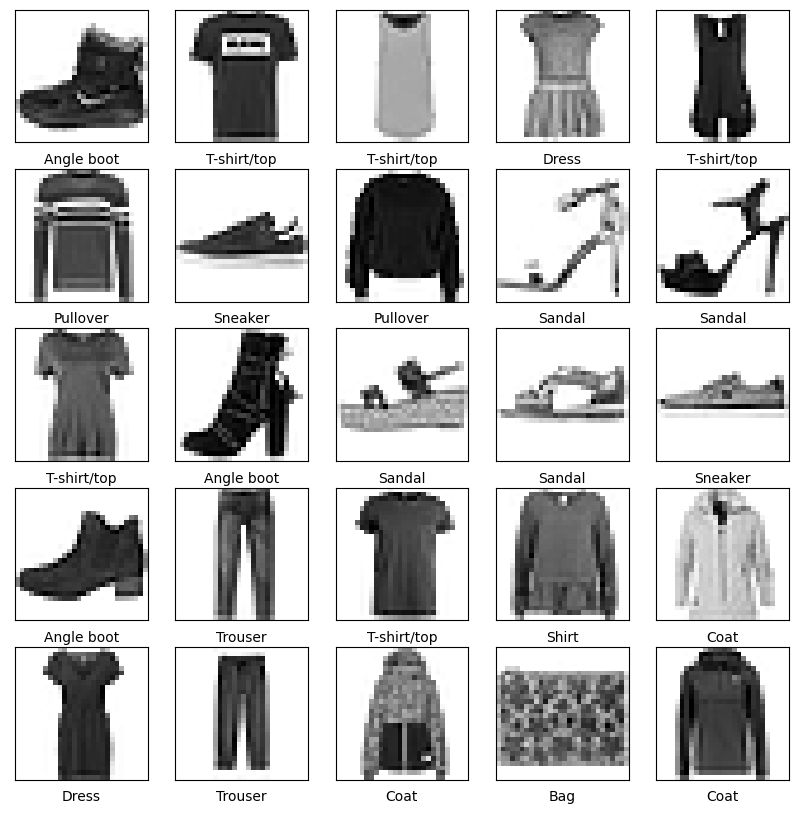

In [11]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

We use the `tf.keras.Sequential` API to build a sequential model with a flatten layer and a single fully connected hidden layer with `relu` activation function. The final layer is the output layer with 10 different possible class. The output is the unnormalized logits (log probabilities).

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

## Train the model

Training the model requires the following steps:

1. Feed the training data to the model. In this example, the training data is the `train_images` and `train_labels` array.
1. The model learns to associate images and labels.
1. You ask the model to make predictions about a test set-in this example, the `test_images` array.
1. Verify that the predictions match the labels from the `test_labels` array.

To start traiing, call the `model.fit` method - so called because it "fits" the model to the training data.

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 4:59 - loss: 2.5446 - accuracy: 0.0312

2022-12-13 18:32:11.139820: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 584us/step - loss: 0.5054 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 1s 578us/step - loss: 0.3791 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.3390 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 1s 577us/step - loss: 0.3130 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 1s 578us/step - loss: 0.2947 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.2816 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 1s 573us/step - loss: 0.2676 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 1s 575us/step - loss: 0.2570 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.2489 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 2s 991us/step - lo

As the model trains, the loss and accuracy metrics are displayed. This model raches and accuracy of about 91% on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy {test_acc:.02%}')
print(f'Test loss: {test_loss}')

313/313 - 0s - loss: 0.3462 - accuracy: 0.8816 - 175ms/epoch - 559us/step
Test accuracy 88.16%
Test loss: 0.3461511433124542


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a ML model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

## Make predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear output - logits - to probabilites, which should be easier to interpret.

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 333us/step


In [18]:
# Here's the prediction for the first image in the test set.
predictions[0]

array([9.3869024e-10, 1.6335278e-10, 8.3167778e-10, 6.6430056e-10,
       1.0071758e-08, 4.6469249e-06, 4.7065102e-10, 9.7666886e-03,
       7.5658141e-10, 9.9022865e-01], dtype=float32)

In [19]:
# These predictions represents the model's "confidence" score that corresponds to each class.
# To see which label has the highest confidence value, we take the argmax.
pred_idx = np.argmax(predictions[0])
print(f'Prediction index: {pred_idx}')
print(f'Predicted class: {class_names[pred_idx]}')

Prediction index: 9
Predicted class: Angle boot


In [20]:
# So the model is most confident that this image is an ankle bot.
# Examining the test label show that this classification is correct.
test_idx = test_labels[0]
print(f'Test index: {test_idx}')
print(f'Test prediction: {class_names[test_idx]}')

Test index: 9
Test prediction: Angle boot


In [21]:
def plot_image(
    i: int,
    predictions_array: np.ndarray,
    true_label: np.ndarray,
    img: np.ndarray
) -> None:
    true_label, img = true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)

    color = 'blue' if predicted_label == true_label else 'red'
    label = f'{class_names[predicted_label]} {np.max(predictions_array):.02%}, ({class_names[true_label]})'

    plt.xlabel(label, color=color)

def plot_value_array(
    i: int,
    predictions_array: np.ndarray,
    true_label: np.ndarray
) -> None:
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    this_plot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

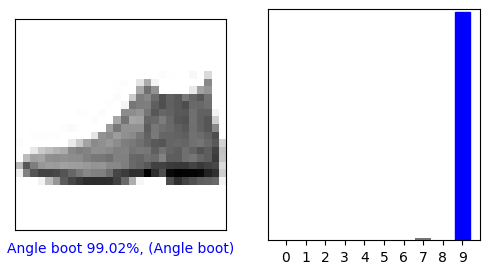

In [22]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

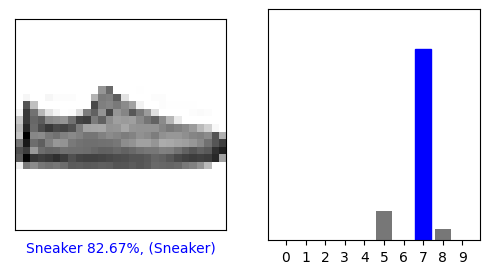

In [23]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

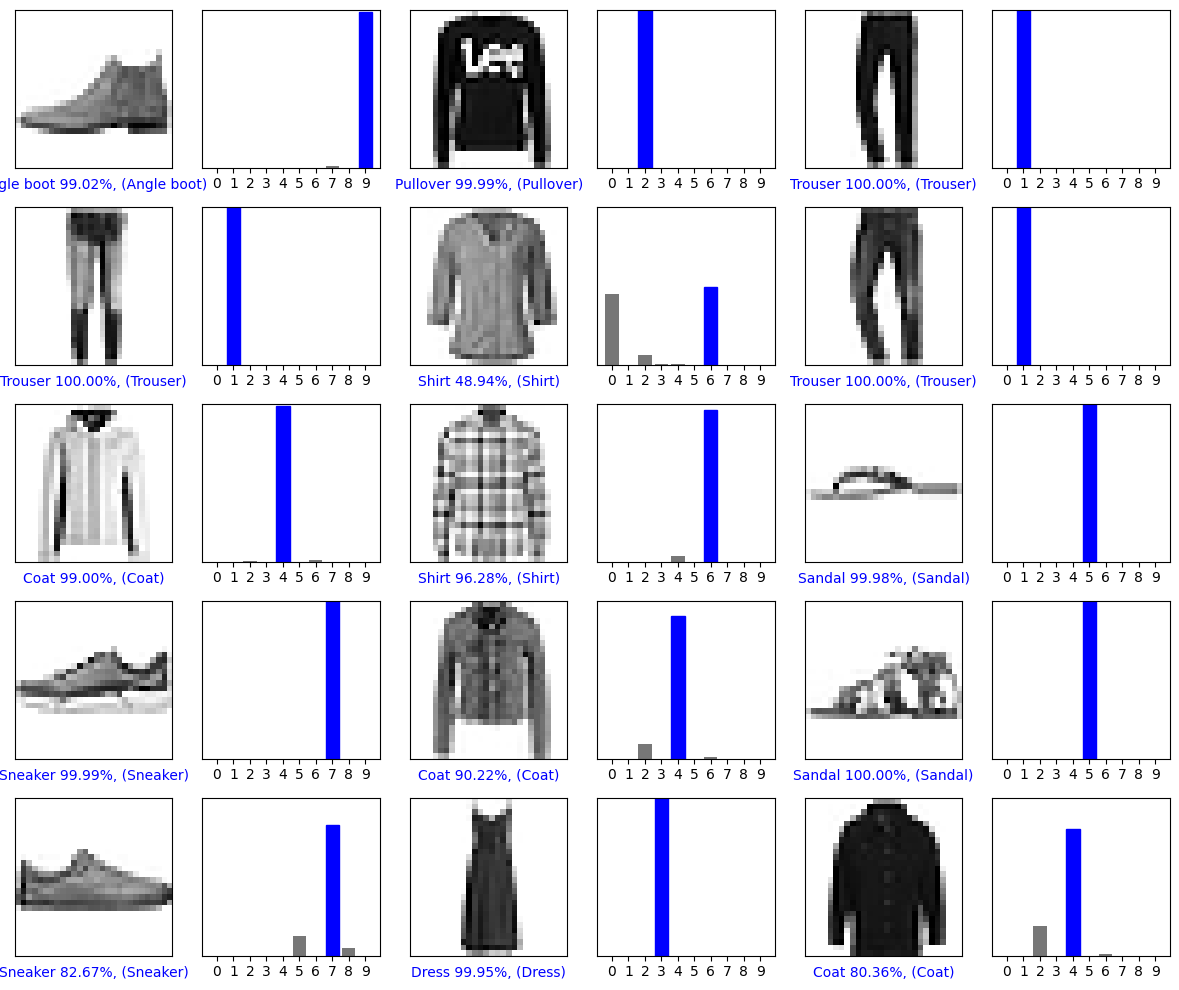

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained mode

Finally, use the trained model to make a prediction about a single image

In [25]:
# Grab an image from the test dataset.
img = test_images[i]

img.shape

(28, 28)

`tf.keras` models are optimized to make predictions on a *batch* or collection of examples at once. Accordingly, even though we're using a single image, we need to add it to a list.

In [26]:
# Add the image to a batch where it's the only member.
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [27]:
# Now predict the correct label for this image
pred_single = probability_model.predict(img)
pred_single

1/1 [==============================] - 0s 9ms/step


array([[7.02751959e-06, 8.92469032e-08, 1.89079225e-01, 1.66257414e-05,
        8.03557932e-01, 2.97908391e-15, 7.23021757e-03, 8.89194707e-12,
        1.08961765e-04, 4.69226047e-10]], dtype=float32)

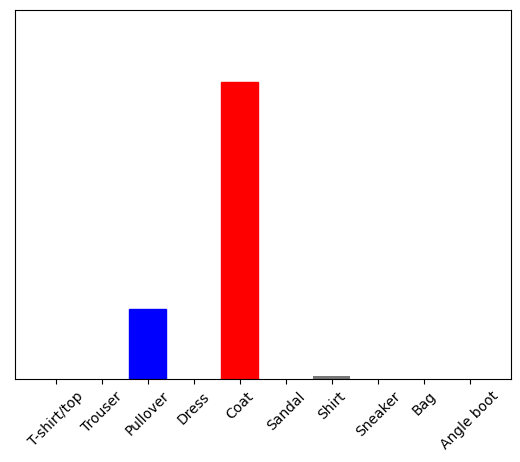

In [28]:
plot_value_array(1, pred_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists --one list for each image in the batch of data. Grab the predictions for our (only) image in the batch.

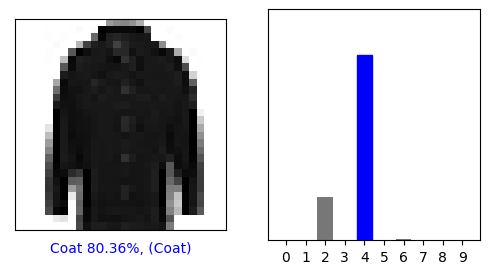

In [29]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred_single[0], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, pred_single[0], test_labels)
plt.show()

In [30]:
idx = np.argmax(pred_single[0])
print(f'Predicted class: {class_names[idx]}')
print(f'True class: {class_names[test_labels[i]]}')

Predicted class: Coat
True class: Coat
